# MNIST Dataset

# MultiClass Classification

Ref Link 
- https://www.youtube.com/watch?v=3xPT2Pk0Jds&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=12

# Creating a Neural Network, training it, getting predictions and improving the model

In [1]:
# Input - we have an image with (28*28) pixels - very low resolution image

# To create the neural network initally - 
# we'll have input layer with 784(28*28) nodes
# One hidden layer with 128 nodes
# 1 output layer with 10 nodes(0-9) for digit classification - jiski P(E) sbse jada hogi that'll be the output

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()  # total 70000 datapoints

In [4]:
x_train.shape # total 60k rows with 28*28 values  -> 3-D array
# each array is an image with 28*28 pixels

(60000, 28, 28)

In [5]:
x_train[0] #pixel values of 1st image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train # means 1st image in x_train is 5, 2nd is 0, 3rd is 4

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
import matplotlib.pyplot as plt

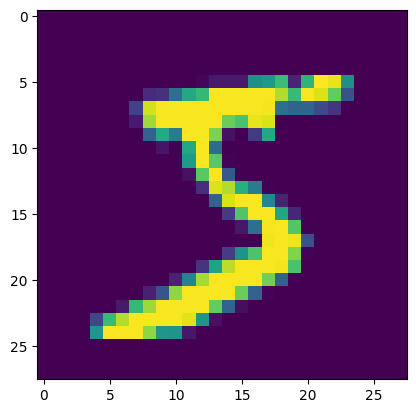

In [9]:
plt.imshow(x_train[0]) # 5

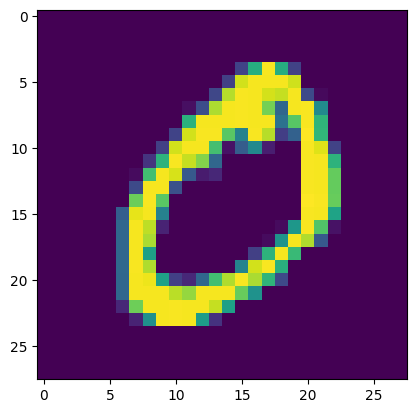

In [10]:
plt.imshow(x_train[1]) # 0

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# we need to convert all values between 0 & 1
# agr values similar range me hogi to weights ka convergence fast hoga.

x_train = x_train/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
x_test = x_test/255
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = Sequential()

In [15]:
# we have values as 28*28 array, and 784 inputs node. So we need to flatten the array (1-D) from 2-D array
# (28*28) to (1*784)

# keras has a function for converting higher dim array to lower dim array i.e flatten layer

In [16]:
model.add(Flatten(input_shape = (28,28))) # flatten layer me koi training ni ho rhi, so no trainable parameters here
model.add(Dense(128 , activation='relu')) # flatten ka O/P direct milega is layer ko so no need to specify input shape explicitly
model.add(Dense(10, activation= 'softmax')) # for multiclass classification (O/P layer me softmax is used as activation function)


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam') 
# can also use categorical crossentropy (but then need to do OHE explicitly)



In [19]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
history

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2825 - val_loss: 0.1486
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1235 - val_loss: 0.1164
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0825 - val_loss: 0.0966
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0612 - val_loss: 0.0892
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0474 - val_loss: 0.0932
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0371 - val_loss: 0.0957
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0297 - val_loss: 0.0870
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0232 - val_loss: 0.0926
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0179 - val_loss: 0.0975
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.016

In [20]:
output = model.predict(x_test) 
#it'll give 10000 arrays and each array has values as output of all 10 nodes from O/P layer (P(E) for being 0, P(E) for being 1, 2,3,4,5,6,7,8,9)

313/313 [==============================] - 1s 2ms/step


In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
output.shape

(10000, 10)

In [23]:
output[0] # this shows P(E)s for the first value in x_test for being 0,1,2,3,4,5,6,7,8,9 respectively

# we see that here at 8th position P(E) is maximum, so that value must be 7 in the original set

array([8.0809796e-11, 4.1920631e-10, 1.3756137e-08, 6.7950822e-07,
       8.2221649e-15, 2.1529312e-10, 4.2421525e-16, 9.9999917e-01,
       1.9545774e-09, 6.9339052e-08], dtype=float32)

In [24]:
output[1] # this shows P(E)s for the second value in x_test for being 0,1,2,3,4,5,6,7,8,9 resp.

# we see that here at 3rd position P(E) is maximum, so that value must be 2 in the original set

array([2.7699471e-13, 2.4267868e-07, 9.9999976e-01, 1.5379331e-10,
       1.0723033e-22, 5.1331476e-15, 8.9090687e-13, 1.6408503e-18,
       2.9843525e-09, 5.0468486e-20], dtype=float32)

In [25]:
y_test # actual values

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
y_pred = output.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.978

In [28]:
# we can improve the accuracy by changing the architecture of neural network i.e changing no of nodes, adding more layers, increasing epochs, etc

In [29]:
history.history

{'loss': [0.2824695408344269,
  0.12346847355365753,
  0.08245792984962463,
  0.06119396537542343,
  0.04743116721510887,
  0.03709666058421135,
  0.029739534482359886,
  0.02315904013812542,
  0.017908336594700813,
  0.016082657501101494],
 'val_loss': [0.14863286912441254,
  0.11639068275690079,
  0.0965699702501297,
  0.08915352076292038,
  0.09315629303455353,
  0.09571823477745056,
  0.08704977482557297,
  0.09262962639331818,
  0.09749480336904526,
  0.09726817160844803]}

In [30]:
import matplotlib.pyplot as plt

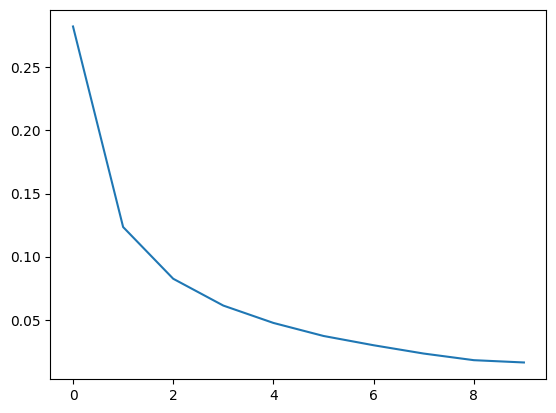

In [31]:
plt.plot(history.history['loss'])

# we see as epochs are increasing, loss is reducing

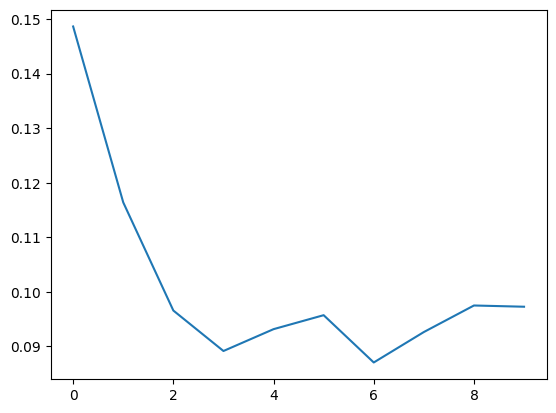

In [32]:
plt.plot(history.history['val_loss'])


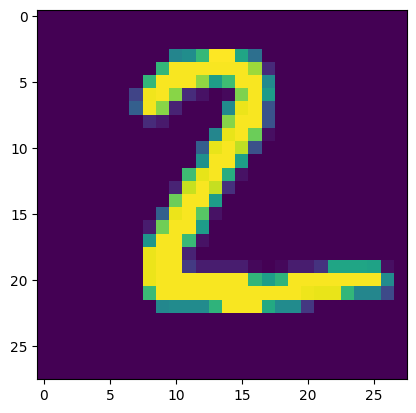

In [33]:
plt.imshow(x_test[1])

In [34]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1) # prediction, which is correct

1/1 [==============================] - 0s 41ms/step


array([2], dtype=int64)

In [35]:
x_test[1].shape

(28, 28)

In [36]:
model.predict(x_test[1].reshape(1,28,28)).argmax()

1/1 [==============================] - 0s 41ms/step


2